In [1]:
# imports
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from myutils.utility import readJson, getSensorData, interpolate1D, getSensorInterpolatedData, find_event

%load_ext autoreload
%autoreload 2

In [2]:
# This is going to take some time ~1-5 min
fields = getSensorData()

Note: sensors 8799 and 8827 are repeated in the json file!
The complete pandas frame has shape  (13984608, 10)
sensor: 6561  1st obs: 2019-01-01 00:01:07  last: 2019-12-31 23:59:37 median dt:  2  min, total obs: 236287
sensor: 8745  1st obs: 2019-01-01 00:01:06  last: 2019-12-31 23:59:47 median dt:  2  min, total obs: 188253
sensor: 8765  1st obs: 2019-01-01 00:01:30  last: 2019-12-31 23:59:52 median dt:  2  min, total obs: 192953
sensor: 8769  1st obs: 2019-01-01 00:00:52  last: 2019-12-31 23:58:53 median dt:  2  min, total obs: 184062
sensor: 8773  1st obs: 2019-01-20 02:37:25  last: 2019-12-31 23:59:00 median dt:  2  min, total obs: 139201
sensor: 8775 did not record any observation.
sensor: 8777  1st obs: 2019-01-01 00:00:46  last: 2019-12-31 23:58:07 median dt:  2  min, total obs: 189325
sensor: 8779 did not record any observation.
sensor: 8781  1st obs: 2019-01-01 00:00:43  last: 2019-10-13 12:10:43 median dt:  2  min, total obs: 137546
sensor: 8783  1st obs: 2019-01-03 06:35:16 

sensor: 9812  1st obs: 2019-01-01 00:00:31  last: 2019-12-31 23:17:08 median dt:  2  min, total obs: 203787
sensor: 9825  1st obs: 2019-01-01 00:01:51  last: 2019-12-31 23:58:31 median dt:  2  min, total obs: 145450
sensor: 10045  1st obs: 2019-01-01 00:00:11  last: 2019-12-31 23:59:55 median dt:  2  min, total obs: 204151
sensor: 10739 did not record any observation.
sensor: 10741  1st obs: 2019-01-05 09:48:27  last: 2019-12-03 09:33:40 median dt:  2  min, total obs: 178224
sensor: 11201 did not record any observation.
sensor: 11529  1st obs: 2019-01-01 00:01:54  last: 2019-12-31 23:57:37 median dt:  2  min, total obs: 202105
sensor: 12030  1st obs: 2019-01-01 00:00:34  last: 2019-12-31 23:58:29 median dt:  2  min, total obs: 203502
sensor: 12183  1st obs: 2019-01-01 00:01:18  last: 2019-12-02 23:59:31 median dt:  2  min, total obs: 186477
sensor: 12505  1st obs: 2019-01-01 00:00:06  last: 2019-12-31 23:58:23 median dt:  2  min, total obs: 184795
sensor: 12554  1st obs: 2019-01-01 00:

In [3]:
# Get all the variable names
varname = list(pd.read_csv('LEUVENAIRfulldump2019.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


In [4]:
sensors_la = readJson('./LEUVENAIRmeta_final.json')
keys = sensors_la.keys()
print(keys)

Note: sensors 8799 and 8827 are repeated in the json file!
dict_keys(['SDS011ID', 'DHTID', 'EXPORT', 'LAT', 'LON', 'STREET', 'POSTALCODE', 'CITY', 'HEIGHT', 'SENSOR_POSITION', 'INDUSTRY', 'WOODSTOVES', 'TRAFFIC', 'SVL', 'NO2_CN'])


Extracting data over duration  31 days 00:00:00  starting at  2019-08-01 00:00:00
Sampling resolution =  1  minute


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


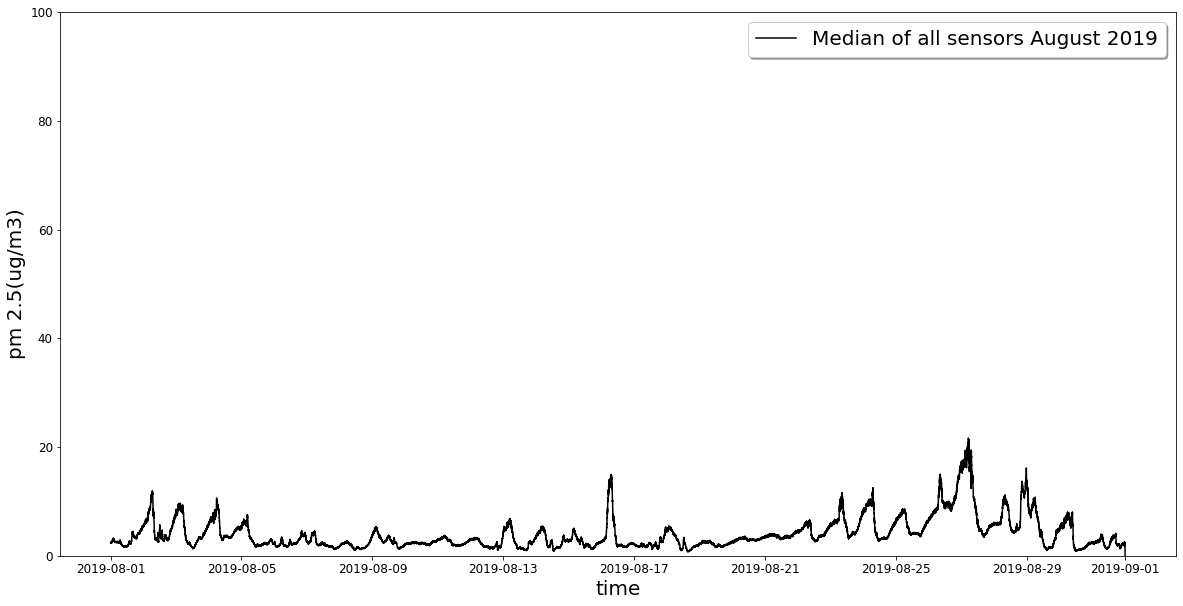

In [5]:
tstart = '2019-08-01 00:00:00'
tstop  = '2019-09-01 00:00:00'
X, Y, xaxis = getSensorInterpolatedData(fields,tstart=tstart,tstop=tstop,fid=4)
nanmedian = np.squeeze(np.nanmedian(Y,axis=0))
plt.clf()
plt.plot(xaxis, nanmedian, 'k', label = 'Median of all sensors August 2019')
left, right = plt.xlim()
bottom, top = plt.ylim()
plt.xlim(left,right)
plt.ylim(0,100)
plt.xlabel('time',fontsize=20)
plt.ylabel('pm 2.5(ug/m3)',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(loc='upper right', shadow=True, fontsize=20)
fig = plt.gcf(); fig.set_size_inches(20, 10)
day = pd.to_datetime(tstart).day
month = pd.to_datetime(tstart).month
year = pd.to_datetime(tstart).year
#plt.savefig('./pm25fig/'+str(day)+'-'+str(month)+'-'+str(year)+'Median'+'.png')